In [1]:
import pandas as pd
import sqlite3

# Conectar
con = sqlite3.connect('src/datasets/taxa_juros.db')

# Consultar os dados
query = "SELECT * FROM taxa_juros"
df = pd.read_sql(query, con)

# Fechar conexão
con.close()

# Análise básica
print("📌 Primeiras linhas:")
print(df.head())

print("\n📌 Tipos de dados:")
print(df.dtypes)

print("\n📌 Estatísticas descritivas:")
print(df.describe(include='all'))

print("\n📌 Valores nulos por coluna:")
print(df.isnull().sum())


📌 Primeiras linhas:
  InicioPeriodo  FimPeriodo codigoSegmento         Segmento codigoModalidade  \
0    2025-05-19  2025-05-23              2  Pessoa Jurídica           502205   
1    2025-05-19  2025-05-23              2  Pessoa Jurídica           502205   
2    2025-05-19  2025-05-23              2  Pessoa Jurídica           502205   
3    2025-05-19  2025-05-23              2  Pessoa Jurídica           502205   
4    2025-05-19  2025-05-23              2  Pessoa Jurídica           502205   

                                          Modalidade  Posicao  \
0  Adiantamento sobre contratos de câmbio (ACC) -...        1   
1  Adiantamento sobre contratos de câmbio (ACC) -...        2   
2  Adiantamento sobre contratos de câmbio (ACC) -...        3   
3  Adiantamento sobre contratos de câmbio (ACC) -...        4   
4  Adiantamento sobre contratos de câmbio (ACC) -...        5   

         InstituicaoFinanceira  TaxaJurosAoMes  TaxaJurosAoAno     cnpj8  
0              BCO MIZUHO S.A.   

In [2]:
df

,InicioPeriodo,FimPeriodo,codigoSegmento,Segmento,codigoModalidade,Modalidade,Posicao,InstituicaoFinanceira,TaxaJurosAoMes,TaxaJurosAoAno,cnpj8
0,2025-05-19,2025-05-23,2,Pessoa Jurídica,502205,Adiantamento sobre contratos de câmbio (ACC) -...,1,BCO MIZUHO S.A.,0.36,4.38,61088183
1,2025-05-19,2025-05-23,2,Pessoa Jurídica,502205,Adiantamento sobre contratos de câmbio (ACC) -...,2,BCO SOCIETE GENERALE BRASIL,0.38,4.70,61533584
2,2025-05-19,2025-05-23,2,Pessoa Jurídica,502205,Adiantamento sobre contratos de câmbio (ACC) -...,3,BCO KDB BRASIL S.A.,0.39,4.76,07656500
3,2025-05-19,2025-05-23,2,Pessoa Jurídica,502205,Adiantamento sobre contratos de câmbio (ACC) -...,4,BCO DO BRASIL S.A.,0.42,5.14,00000000
4,2025-05-19,2025-05-23,2,Pessoa Jurídica,502205,Adiantamento sobre contratos de câmbio (ACC) -...,5,BBVA BRASIL BI S.A.,0.42,5.19,45283173
...,...,...,...,...,...,...,...,...,...,...,...
9995,2025-04-29,2025-05-06,1,Pessoa Física,401101,Aquisição de veículos - Pré-fixado,33,BCO VOTORANTIM S.A.,2.27,30.89,59588111
9996,2025-04-29,2025-05-06,1,Pessoa Física,401101,Aquisição de veículos - Pré-fixado,34,BCO DO ESTADO DO RS S.A.,2.43,33.46,92702067
9997,2025-04-29,2025-05-06,1,Pessoa Física,401101,Aquisição de veículos - Pré-fixado,35,BCO HONDA S.A.,2.47,34.04,03634220
9998,2025-04-29,2025-05-06,1,Pessoa Física,401101,Aquisição de veículos - Pré-fixado,36,BCO DIGIMAIS S.A.,2.49,34.28,92874270


In [3]:
# Média da Taxa de Juros ao mês por Instituição Financeira
media_taxa_mes = df.groupby('InstituicaoFinanceira')['TaxaJurosAoMes'].mean().sort_values(ascending=False)
print("📌 Média da Taxa de Juros ao Mês por Instituição:\n")
print(media_taxa_mes)

# Total de registros por Instituição
total_por_instituicao = df['InstituicaoFinanceira'].value_counts()
print("\n📌 Total de registros por Instituição:\n")
print(total_por_instituicao)


📌 Média da Taxa de Juros ao Mês por Instituição:

InstituicaoFinanceira
CREFISA S.A. CFI                        17.506000
JBCRED S.A. SCFI                        16.333000
REALIZE CFI S.A.                        16.314615
MIDWAY S.A. - SCFI                      15.329487
CALCRED S.A.                            14.388947
                                          ...    
SCOTIABANK BRASIL                        0.400000
BCO KDB BRASIL S.A.                      0.390000
BCO RABOBANK INTL BRASIL S.A.            0.332857
DAYCOVAL LEASING - BCO MÚLTIPLO S.A.     0.175000
BCO XCMG BRASIL S.A.                     0.155000
Name: TaxaJurosAoMes, Length: 172, dtype: float64

📌 Total de registros por Instituição:

InstituicaoFinanceira
BCO DO BRASIL S.A.                290
BCO BRADESCO S.A.                 282
BCO SAFRA S.A.                    250
BCO DO ESTADO DO RS S.A.          244
BCO SANTANDER (BRASIL) S.A.       236
                                 ... 
BCO XCMG BRASIL S.A.                2


Somando todas as taxas de juros ao mês, total de registros e tirando a média GERAL da taxa de juros ao mês


In [5]:
soma_taxas = df['TaxaJurosAoMes'].sum()
total_registros = df['TaxaJurosAoMes'].count()
media_geral = round(soma_taxas / total_registros, 2)
print("Média geral da Taxa de Juros ao Mês:", media_geral)


Média geral da Taxa de Juros ao Mês: 4.74


Soma total das TaxaJurosAoMes  (como se somasse os “valores de juros cobrados”) e soma total das taxas anuais


In [8]:
soma_juros_mes = df['TaxaJurosAoMes'].sum() * 1e3  
soma_juros_ano = df['TaxaJurosAoAno'].sum() * 1e3  
print("Soma estimada das Taxas de Juros ao Mês (x1000):", round(soma_juros_mes, 2))
print("Soma estimada das Taxas de Juros ao Ano (x1000):", round(soma_juros_ano, 2))

Soma estimada das Taxas de Juros ao Mês (x1000): 47437690.0
Soma estimada das Taxas de Juros ao Ano (x1000): 1057367670.0


Quantos % as instituições financeiras estão cobrando de taxa de juros

In [9]:
media_juros_mes = df['TaxaJurosAoMes'].mean() * 1e3  
media_juros_ano = df['TaxaJurosAoAno'].mean() * 1e3

print("📊 Média estimada da Taxa de Juros ao Mês (x1000):", round(media_juros_mes, 2))
print("📆 Média estimada da Taxa de Juros ao Ano (x1000):", round(media_juros_ano, 2))

#Esse resultado quer dizer que, em média, as instituições financeiras estão cobrando uma taxa de juros de aproximadamente 4,74% ao mês, e 105,74% ao ano, por mil operações analisadas.

📊 Média estimada da Taxa de Juros ao Mês (x1000): 4743.77
📆 Média estimada da Taxa de Juros ao Ano (x1000): 105736.77


In [10]:
df.head()

,InicioPeriodo,FimPeriodo,codigoSegmento,Segmento,codigoModalidade,Modalidade,Posicao,InstituicaoFinanceira,TaxaJurosAoMes,TaxaJurosAoAno,cnpj8
0,2025-05-19,2025-05-23,2,Pessoa Jurídica,502205,Adiantamento sobre contratos de câmbio (ACC) -...,1,BCO MIZUHO S.A.,0.36,4.38,61088183
1,2025-05-19,2025-05-23,2,Pessoa Jurídica,502205,Adiantamento sobre contratos de câmbio (ACC) -...,2,BCO SOCIETE GENERALE BRASIL,0.38,4.70,61533584
2,2025-05-19,2025-05-23,2,Pessoa Jurídica,502205,Adiantamento sobre contratos de câmbio (ACC) -...,3,BCO KDB BRASIL S.A.,0.39,4.76,07656500
3,2025-05-19,2025-05-23,2,Pessoa Jurídica,502205,Adiantamento sobre contratos de câmbio (ACC) -...,4,BCO DO BRASIL S.A.,0.42,5.14,00000000
4,2025-05-19,2025-05-23,2,Pessoa Jurídica,502205,Adiantamento sobre contratos de câmbio (ACC) -...,5,BBVA BRASIL BI S.A.,0.42,5.19,45283173


In [19]:
    # 📊 Estatísticas descritivas das colunas numéricas
estatisticas = df.describe().T  # Gera média, std, min, max etc.

# 🧮 Adiciona o coeficiente de variação (quanto a coluna é dispersa em relação à média)
estatisticas['coef_var'] = estatisticas['std'] / estatisticas['mean']

# Mostra o resultado
print(estatisticas)


                  count        mean         std  min    25%    50%       75%  \
Posicao         10000.0   22.708100   16.624715  1.0   9.00  20.00   33.0000   
TaxaJurosAoMes  10000.0    4.743769    4.712019  0.0   1.77   2.52    6.1425   
TaxaJurosAoAno  10000.0  105.736767  163.344035  0.0  23.41  34.82  104.5000   

                   max  coef_var  
Posicao          85.00  0.732105  
TaxaJurosAoMes   22.07  0.993307  
TaxaJurosAoAno  994.61  1.544818  


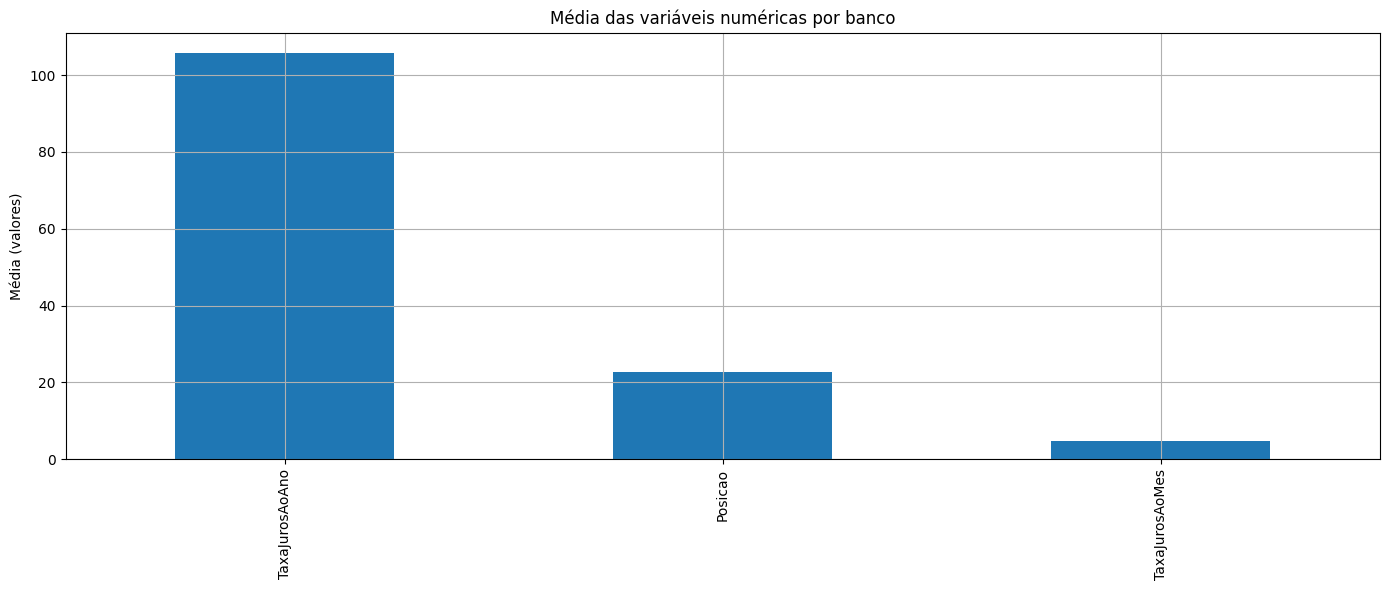

In [21]:
import matplotlib.pyplot as plt

# Considerando as colunas numéricas: digamos que sejam col1 e col2
estatisticas['mean'].sort_values(ascending=False).plot(
    kind='bar', figsize=(14,6),
    title='Média das variáveis numéricas por banco'
)

plt.ylabel('Média (valores)')
plt.tight_layout()
plt.grid(True)
plt.show()


In [24]:
import pandas as pd

# Suponha que df seja seu DataFrame com as colunas numéricas
estatisticas = df.describe().T

# Calcula coeficiente de variação
estatisticas['coef_var'] = estatisticas['std'] / estatisticas['mean']

# Ordena pelo coeficiente de variação decrescente para ver quais são mais variáveis
estatisticas_cv = estatisticas.sort_values('coef_var', ascending=False)

print(estatisticas_cv[['mean', 'std', 'coef_var']])


                      mean         std  coef_var
TaxaJurosAoAno  105.736767  163.344035  1.544818
TaxaJurosAoMes    4.743769    4.712019  0.993307
Posicao          22.708100   16.624715  0.732105


In [3]:
# Importações básicas para análise e visualização
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações opcionais para melhorar visualização
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)


In [3]:
df = pd.read_csv('src/datasets/taxajuros.csv', sep=';')
print(df.columns)

Index(['InicioPeriodo', 'FimPeriodo', 'codigoSegmento', 'Segmento',
       'codigoModalidade', 'Modalidade', 'Posicao', 'InstituicaoFinanceira',
       'TaxaJurosAoMes', 'TaxaJurosAoAno', 'cnpj8'],
      dtype='object')


Instituição com maior média de juros ao ano

In [7]:
df.groupby("InstituicaoFinanceira")["TaxaJurosAoAno"].mean().sort_values(ascending=False).head(1)


InstituicaoFinanceira
CREFISA S.A. CFI    682.487333
Name: TaxaJurosAoAno, dtype: float64

Instituição com mais registros (vendas ou ofertas)

In [8]:
df["InstituicaoFinanceira"].value_counts().head(1)

InstituicaoFinanceira
BCO DO BRASIL S.A.    290
Name: count, dtype: int64

. Instituição com maior média de juros ao mês

In [9]:
df.groupby("InstituicaoFinanceira")["TaxaJurosAoMes"].mean().sort_values(ascending=False).head(1)


InstituicaoFinanceira
CREFISA S.A. CFI    17.506
Name: TaxaJurosAoMes, dtype: float64

 Instituição com maior valor de juros ao ano (não média, mas o pico)

In [10]:
df.loc[df["TaxaJurosAoAno"] == df["TaxaJurosAoAno"].max(), ["InstituicaoFinanceira", "TaxaJurosAoAno"]]


,InstituicaoFinanceira,TaxaJurosAoAno
5734,BCO CREFISA S.A.,994.61
6483,BCO CREFISA S.A.,994.61
7222,BCO CREFISA S.A.,994.61
